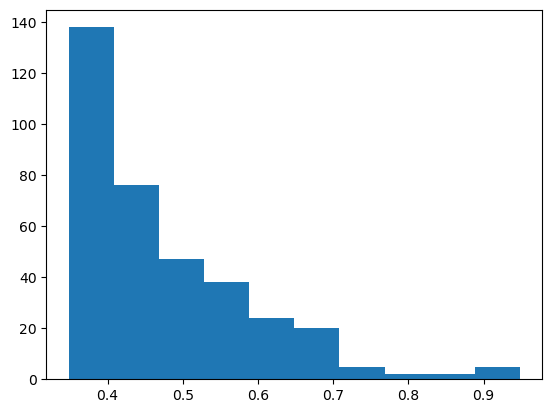

D_Mapper(verbose=2)
Mapping on data shaped (357, 357) using lens shaped (357,)



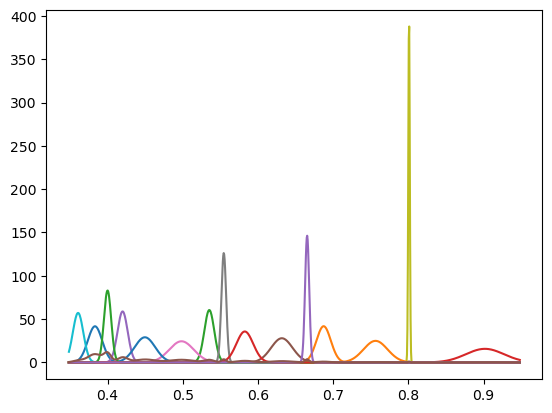

 - Cover - centers: [0.3608796887686922, 0.38335525103910995, 0.4000793593182697, 0.4200734310639483, 0.44973822060382146, 0.49839232839952613, 0.535362892206202, 0.5546183268154014, 0.5825549248608075, 0.6317984672064206, 0.6654294888114904, 0.6873950252637121, 0.7563839284143288, 0.8009463426011115, 0.9018395750094507]
inner_range: [0.55958861]
radius: [0.019165320286206433, 0.026242799989337318, 0.013189686036681636, 0.018605146022715957, 0.03770328966775377, 0.04478104227517593, 0.018107602105906118, 0.008677983704264647, 0.030640840836705596, 0.0391931982193231, 0.007486203810723513, 0.026198428078192504, 0.04393677702873933, 0.0027477813854449584, 0.06961191101754971]
bic:-604.9187806065656
alpha_max:0.0
13 and 14 have no intersection
Minimal points in hypercube before clustering: 3
Creating 15 hypercubes.
There are 43 points in cube 1/15
There are 135 points in cube 2/15
There are 74 points in cube 3/15
There are 63 points in cube 4/15
There are 87 points in cube 5/15
There are 

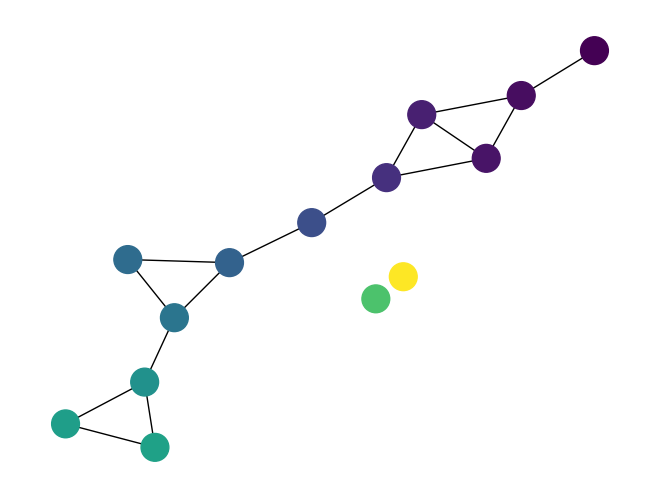

  6%|▌         | 6/100 [00:12<02:45,  1.76s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
 20%|██        | 20/100 [00:39<02:18,  1.73s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
 27%|██▋       | 27/100 [00:52<02:28,  2.03s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 40%|████      | 40/100 [01:17<01:43,  1.72s/it]/home/farmer/mi

SC:-0.04968015046636
SC_norm:0.47515992476682
TSR:0.14285714285714285
SC_adj:0.30900853381198146


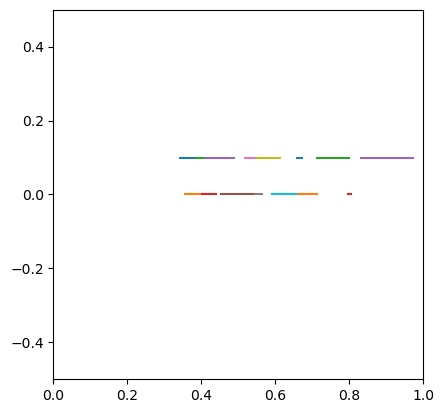

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import kmapper.evaluate as evaluate
import sklearn

dm = np.genfromtxt('dis_matrix.csv', delimiter=',')

scaler = MinMaxScaler()
dm = scaler.fit_transform(dm)

projected_data = np.mean(dm, axis=1)

plt.hist(projected_data)
plt.show()
n = 15 #8 #7 #6
a = 0.006#0.0091 #0.0024 #0.0763
cover = km.D_Cover(n_cubes=n,alpha = a,tol = 1*1e-8,n_init=100,verbose=2)

mapper = km.D_Mapper(verbose=2)


graph = mapper.map(
    projected_data,
    dm,
    clusterer = sklearn.cluster.DBSCAN(eps=0.6,  min_samples=3, metric='precomputed'), #0.6 1
    cover=cover,
    precomputed=True
)


mapper.visualize(graph, path_html="covid-19.html")
color_list = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list.append(color)
G = km.adapter.to_networkx(graph)
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_color=color_list, node_size =400)
#plt.savefig('covid19.jpg',dpi=350)
plt.savefig('covid19.eps',bbox_inches='tight')
plt.show()

SC_adj = evaluate.compute_SC_adj(dm, projected_data, graph
                                 , Cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0,tol = 1*1e-8)
                                 , type = 'd'
                                 , cluster = sklearn.cluster.DBSCAN(eps=0.6,  min_samples=3, metric='precomputed')
                                 , precompute = True)

interval_table = cover.interval_table
for i in range(1,interval_table.shape[1]+1):
    plt.plot([interval_table[0,i-1],interval_table[1,i-1]],[0.1*(i % 2),0.1*(i%2)])

ax = plt.gca()
ax.set_aspect(1)
plt.xlim((0, 1))
plt.ylim((-0.5, 0.5))
plt.show()
